In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
ALPHAVANTAGE_KEY = os.getenv('ALPHAVANTAGE_KEY')

In [3]:
URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=%s&datatype=csv'.format(ALPHAVANTAGE_KEY)

In [4]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 3,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                    }
                   )

In [5]:
def total_return(prices):
  return prices.iloc[-1] / prices.iloc[0] - 1

In [6]:
df = pd.read_csv(URL)
df['timestamp'] = pd.to_datetime(df.timestamp)
df.index = df.timestamp.dt.date
df = df[::-1]
df.rename(columns={"close (USD)": "btc_close"}, inplace=True)
df = df.drop(['open (USD)', 'high (USD)', 'low (USD)', 'open (USD).1', 'high (USD).1', 'low (USD).1', 'close (USD).1'], axis=1)
df['pct_change'] = df['btc_close'].pct_change()
df[['timestamp', 'btc_close', 'pct_change']].to_csv('bitcoin_daily_returns.csv')
df[['timestamp', 'btc_close', 'pct_change']]
df

,timestamp,btc_close,volume,market cap (USD),pct_change
timestamp,,,,,
2020-06-05,2020-06-05,"9,621.1600","47,788.0500","47,788.0500",NaN
2020-06-06,2020-06-06,"9,666.3000","32,752.9509","32,752.9509",0.0047
2020-06-07,2020-06-07,"9,746.9900","57,952.8484","57,952.8484",0.0083
2020-06-08,2020-06-08,"9,782.0100","40,664.6641","40,664.6641",0.0036
2020-06-09,2020-06-09,"9,772.4300","46,024.0013","46,024.0013",-0.0010
...,...,...,...,...,...
2023-02-25,2023-02-25,"23,157.0700","191,311.8101","191,311.8101",-0.0012
2023-02-26,2023-02-26,"23,554.8500","202,323.7362","202,323.7362",0.0172
2023-02-27,2023-02-27,"23,492.0900","283,706.0859","283,706.0859",-0.0027


In [7]:
btc_monthly_returns = df.groupby([df.timestamp.dt.year, df.timestamp.dt.month])['btc_close'].apply(total_return)
btc_monthly_returns.to_csv("bitcoin_monthly_returns.csv")
btc_monthly_returns

timestamp  timestamp
2020       6           -0.0502
           7            0.2278
           8           -0.0129
           9           -0.0961
           10           0.2987
           11           0.4312
           12           0.5414
2021       1            0.1282
           2            0.3463
           3            0.1846
           4           -0.0175
           5           -0.3555
           6           -0.0449
           7            0.2375
           8            0.1821
           9           -0.1022
           10           0.2733
           11          -0.0650
           12          -0.1918
2022       1           -0.1939
           2            0.1154
           3            0.0245
           4           -0.1869
           5           -0.1733
           6           -0.3309
           7            0.2082
           8           -0.1383
           9           -0.0352
           10           0.0611
           11          -0.1621
           12          -0.0256
2023       1      

# 200-Day SMA Chart

* TODO: Connect to Zod DB from Coinmarketcap for longer history

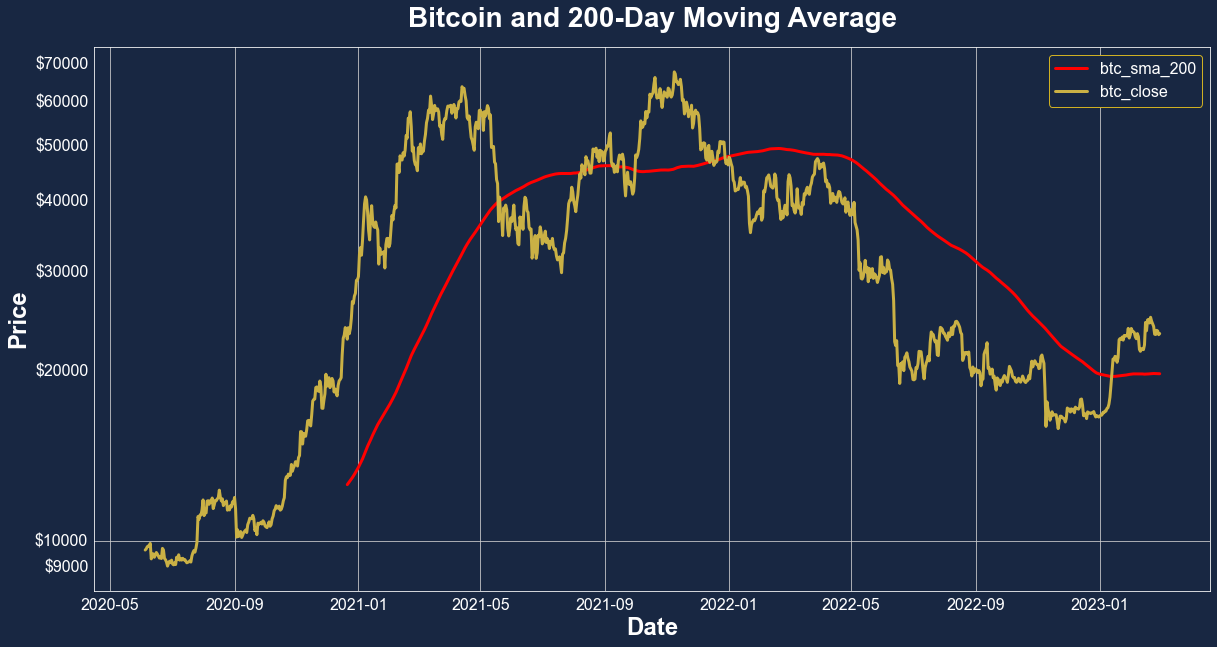

In [8]:

prices = df[['btc_close']].copy()
prices
prices['btc_sma_200'] = df[['btc_close']].rolling(200).mean()
ax = prices[['btc_sma_200', 'btc_close']].plot.line(figsize=(20, 10), title='Bitcoin and 200-Day Moving Average', logy=True, color={'btc_sma_200': 'red', 'btc_close': '#CAB145'}, xlabel="Date", ylabel="Price")

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.get_figure().savefig('graph-btc-sma-200.pdf', format='pdf')
prices[['btc_sma_200', 'btc_close']].to_csv('btc-sma-200.csv')